<a href="https://colab.research.google.com/github/tashfeen786/python-Projects/blob/main/M2_DIY_AI_ML_Pipeline_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes Classification Challenge: End-to-End AI Pipeline**  
*From Data Cleaning to Model Comparison*  

In this hands-on challenge, **YOU** will go through a complete **AI/ML pipeline** using **Naive Bayes** classification. The dataset will have:  
✅ **Missing values** (requiring imputation)  
✅ **Categorical features** (requiring encoding)  
✅ **Text data** (if applicable, requiring TF-IDF/BOW)  
✅ **Numerical features** (for Gaussian Naive Bayes)  

---

## **Pipeline Steps**  
1. **Data Loading & Exploration**  
2. **Handling Missing Values**  
3. **Encoding Categorical Features**  
5. **Train-Test Split**  
6. **Naive Bayes from Scratch**  
7. **Naive Bayes using `scikit-learn`**  
8. **Model Comparison & Analysis**  

---

### **Learning Objectives**  
- Practice full ML workflow from raw data to evaluation  
- Compare manual vs. library implementations  
- Understand the impact of preprocessing decisions  

Let's begin!


# Data Loading & Exploration
**Objective**: Find and load the Titanic dataset, then perform initial exploration to identify data quality issues.


## Step 1: Import Required Libraries
## We'll use these key Python packages:
## - `pandas` for data manipulation
## - `numpy` for numerical operations
## - `matplotlib` and `seaborn` for visualization



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Step 1: Download the Data
First, obtain the Titanic dataset from this reliable source:  
📥 [Download Titanic Dataset](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)


## Step 2: Load into Python
Use pandas to load the data directly from URL or local file:



###Load directly from web (easiest method)
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

 Or if downloaded locally:

 data = pd.read_csv("titanic.csv")

In [ ]:
#your code here
data = pd.read_csv("/content/titanic_dataset.csv")

## Data Inspection

### Displaying All Columns

pd.set_option('display.max_columns', None)  # Show all columns without truncation

print("First 5 rows:")

display(data.head())  # Interactive display of first 5 records

In [ ]:
pd.set_option('display.max_columns', None)

print("First 5 rows:")
display(data.head())

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Statistical Summary

### Numerical Features Analysis

print("Numerical features summary:")
display(data.describe())

In [ ]:
print("Numerical features summary:")
display(data.describe())


Numerical features summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Missing Value Analysis

### Understanding Missing Data

print("Missing values per column:")

missing = data.isnull().sum()



In [ ]:
print("Missing values per column:")
missing = data.isnull().sum()
print(missing)

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



#Target Variable Distribution
Essential for understanding class imbalance

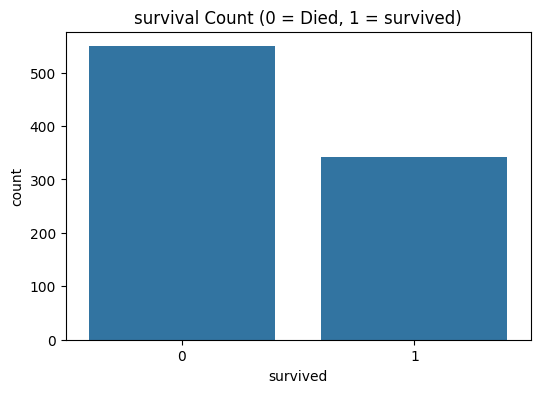

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=data)
plt.title("survival Count (0 = Died, 1 = survived)")
plt.show()

## Handling Missing Values & Categorical Encoding

### 1. Filling Missing Values

#### Common Strategies:

from sklearn.impute import SimpleImputer

##For numerical columns (Age, Fare)
num_imputer = SimpleImputer(strategy='median')  # Alternatives: 'mean', 'constant'

data['Age'] = num_imputer.fit_transform(data[['Age']])

## For categorical columns (Embarked)
cat_imputer = SimpleImputer(strategy='most_frequent')

data['Embarked'] = cat_imputer.fit_transform(data[['Embarked']])

In [ ]:
from sklearn.impute import SimpleImputer

# Imputer for numerical columns using median strategy
num_imputer = SimpleImputer(strategy='median')

# Apply imputer to Age
data['age'] = num_imputer.fit_transform(data[['age']])

# Most frequent imputation for embarked
cat_imputer = SimpleImputer(strategy='most_frequent')
data['embarked'] = cat_imputer.fit_transform(data[['embarked']]).ravel()
data['embark_town'] = cat_imputer.fit_transform(data[['embark_town']]).ravel()

data.drop(columns='deck', inplace=True)



# Label Encoding: Essential Guide

## What is Label Encoding?
Converts categorical text values into numeric labels:
- Assigns a unique integer to each category
- Preserves no mathematical relationship between values

Before:           After:

['Dog']           [0]

['Cat']           [1]

['Bird']          [2]


# Initialize and fit
le = LabelEncoder()
encoded_colors = le.fit_transform(colors)

In [ ]:
print(data.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Columns to encode
columns_to_encode = ['sex', 'embarked', 'class', 'who',  'embark_town', 'alive']

# Loop through each column and encode
for col in columns_to_encode:
    data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])


# Data Splitting: Train-Test Validation

## Why Split Data?
- **Train set**: Used to train the model (~70-80%)
- **Test set**: Used to evaluate final performance (~20-30%)
- Prevents overfitting by testing on unseen data

## Basic Splitting (sklearn)

from sklearn.model_selection import train_test_split

## Features (X) and Target (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

## Split with 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=y       # Preserves class distribution
)

print(f"Train size: {len(X_train)} samples")

print(f"Test size: {len(X_test)} samples")

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('survived', axis=1)
y = data['survived']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y )

# Step 3: Print results
print(f"Train size: {len(X_train)} samples")
print(f"Test size: {len(X_test)} samples")


Train size: 623 samples
Test size: 268 samples


# Naive Bayes Implementation from scratch

## The 3-Step Process

1. **Calculate Priors (P(y))**  
   - Estimate class probabilities from training data  
   - Example: In Titanic dataset, P(Survived=1) ≈ 38%, P(Survived=0) ≈ 62%

2. **Compute Likelihoods (P(X|y))**  
   - For continuous features: Assume Gaussian distribution  
     ```math
     P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}e^{-\frac{(x-\mu_y)^2}{2\sigma_y^2}}
     ```
   - For categorical features: Use frequency counts  
   - *Naive* assumption: Features are conditionally independent  
     ```math
     P(X|y) = \prod_{i=1}^n P(x_i|y)
     ```

3. **Predict Using Posteriors**  
   - Apply Bayes' Theorem (ignoring denominator P(X)):  
     ```math
     P(y|X) \propto P(y) \times \prod_{i=1}^n P(x_i|y)
     ```
   - Practical implementation uses log probabilities:  
     ```python
     log_posterior = log(P(y)) + sum(log(P(x_i|y)))
     ```
   - Final prediction: Class with highest log posterior

## Titanic Example Walkthrough
For a passenger with [Age=25, Fare=50]:

1. **Calculate for Survived=0**  
   - log P(Age=25|0) = -1.2  
   - log P(Fare=50|0) = -4.5  
   - log P(0) = -0.48  
   - **Total**: -6.18

2. **Calculate for Survived=1**  
   - log P(Age=25|1) = -1.5  
   - log P(Fare=50|1) = -3.8  
   - log P(1) = -0.92  
   - **Total**: -6.22

3. **Prediction**: argmax(-6.18, -6.22) → Survived=0



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       103

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



# scikit-learn's Naive Bayes

### 1. Overview of Implementations

### GaussianNB
- **Use Case**: Continuous features assumed to follow normal distribution
- **Math**: Uses Gaussian probability density function
- **Best For**: Medical diagnosis, sensor data

### MultinomialNB
- **Use Case**: Discrete counts (word frequencies in text)
- **Math**: Uses multinomial distribution
- **Best For**: Text classification, recommendation systems

### BernoulliNB
- **Use Case**: Binary/boolean features
- **Math**: Binomial distribution
- **Best For**: Spam detection, document categorization

### ComplementNB
- **Use Case**: Imbalanced text datasets
- **Math**: Adapts MultinomialNB for class imbalance
- **Best For**: Sentiment analysis with skewed classes

### CategoricalNB
- **Use Case**: Categorical features with discrete values
- **Math**: Categorical distribution
- **Best For**: Survey data, categorical attributes

## 2. Detailed Implementation

### GaussianNB for Titanic Survival
```python
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create pipeline with scaling
nb_pipe = make_pipeline(
    StandardScaler(),
    GaussianNB(var_smoothing=1e-9)
)

# Fit and predict
nb_pipe.fit(X_train, y_train)
y_proba = nb_pipe.predict_proba(X_test)

# Access learned parameters
gnb = nb_pipe.named_steps['gaussiannb']
print("Class means:\n", gnb.theta_)
print("Class variances:\n", gnb.sigma_)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
nb_pipe = make_pipeline( StandardScaler(), GaussianNB(var_smoothing=1e-9) )
nb_pipe.fit(X_train, y_train)
y_proba = nb_pipe.predict_proba(X_test)
gnb = nb_pipe.named_steps['gaussiannb']
print("Class means:\n", gnb.theta_)
print("Class variances (σ²):\n", gnb.sigma_)

Class means:
 [[ 0.2645498   0.43592314  0.07271845  0.01171091 -0.08006255 -0.22041899
   0.14083848  0.2645498  -0.24953875  0.4520728   0.14083848 -0.78892068
   0.16036706]
 [-0.42505072 -0.70039534 -0.11683634 -0.01881586  0.12863606  0.35414599
  -0.22628442 -0.42505072  0.40093256 -0.72634292 -0.22628442  1.26755456
  -0.25766088]]


AttributeError: 'GaussianNB' object has no attribute 'sigma_'

# Model Evaluation: Accuracy & Confusion Matrix

## Key Metrics Explained

**1. Accuracy**  
- Measures overall correctness: `(TP + TN) / (TP + TN + FP + FN)`  
- Best for balanced datasets  
- **Limitation**: Misleading with class imbalance  

**2. Confusion Matrix**  
Visualizes model performance across classes:

In [ ]:
# Essential imports
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#your code here